# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih.

In [6]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [7]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()
df = df.dropna()

In [8]:
# Melakukan feature scaling menggunakan MinMaxScaler() untuk fitur numerik.
numeric_columns = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007554,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336790,2024-11-04 8:08:08
1,TX000002,AC00455,0.205368,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918049,2024-11-04 8:09:35
2,TX000003,AC00019,0.068840,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068578,2024-11-04 8:07:04
3,TX000004,AC00070,0.100636,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569170,2024-11-04 8:09:06
5,TX000006,AC00393,0.050192,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,0.000000,Student,0.558621,0.0,0.045677,2024-11-04 8:06:36


In [9]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007554,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336790,2024-11-04 8:08:08
1,0.205368,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918049,2024-11-04 8:09:35
2,0.068840,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068578,2024-11-04 8:07:04
3,0.100636,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569170,2024-11-04 8:09:06
5,0.050192,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045677,2024-11-04 8:06:36


In [10]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007554,591,1,36,0,0.838710,0,0.244828,0.0,0.336790,105
1,0.205368,1031,1,15,0,0.806452,0,0.451724,0.0,0.918049,192
2,0.068840,1097,1,23,2,0.016129,3,0.158621,0.0,0.068578,41
3,0.100636,712,1,33,2,0.129032,3,0.051724,0.0,0.569170,163
5,0.050192,550,1,28,0,0.000000,3,0.558621,0.0,0.045677,13


In [11]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

# **4. Analisis Clustering**

Pada tahap ini, Anda akan melakukan **Analisis Clustering** untuk mengelompokkan data berdasarkan karakteristik yang sama.

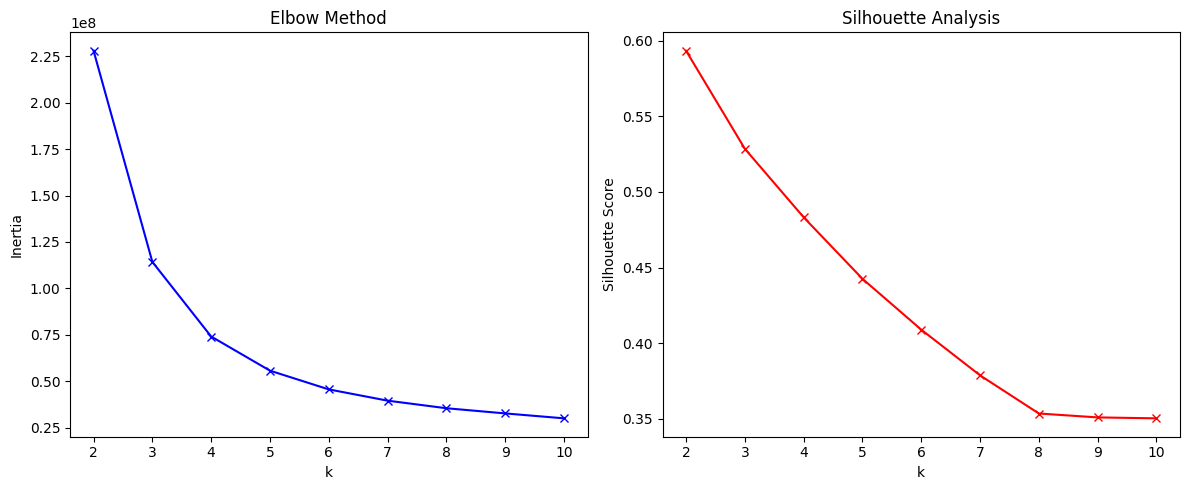

In [13]:
# Menentukan jumlah cluster optimal menggunakan metode Elbow Method dan Silhouette Analysis
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [14]:
# Melakukan clustering menggunakan algoritma K-Means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df)

# Menambahkan kolom cluster ke dataset
df['Cluster'] = cluster_labels
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Cluster
0,0.007554,591,1,36,0,0.838710,0,0.244828,0.0,0.336790,105,1
1,0.205368,1031,1,15,0,0.806452,0,0.451724,0.0,0.918049,192,2
2,0.068840,1097,1,23,2,0.016129,3,0.158621,0.0,0.068578,41,2
3,0.100636,712,1,33,2,0.129032,3,0.051724,0.0,0.569170,163,1
5,0.050192,550,1,28,0,0.000000,3,0.558621,0.0,0.045677,13,1


In [15]:
# Menyimpan dataset hasil clustering ke file CSV
df.to_csv('data_clustering.csv', index=False)
print("Dataset hasil clustering telah disimpan sebagai 'data_clustering.csv'")

Dataset hasil clustering telah disimpan sebagai 'data_clustering.csv'


# **5. Interpretasi Hasil Clustering**

Pada tahap ini, Anda akan melakukan **Interpretasi Hasil Clustering** untuk memberikan makna pada setiap cluster yang telah dibuat.

In [18]:
# Menganalisis karakteristik setiap cluster berdasarkan fitur-fitur yang ada
cluster_summary = df.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'std'],
    'CustomerAge': ['mean', 'std'],
    'TransactionDuration': ['mean', 'std'],
    'LoginAttempts': ['mean', 'std'],
    'AccountBalance': ['mean', 'std']
}).round(2)

print("Analisis karakteristik cluster:")
print(cluster_summary)

Analisis karakteristik cluster:
        TransactionAmount       CustomerAge       TransactionDuration        \
                     mean   std        mean   std                mean   std   
Cluster                                                                       
0                    0.17  0.17        0.43  0.29                0.39  0.25   
1                    0.16  0.15        0.41  0.29                0.37  0.24   
2                    0.16  0.16        0.45  0.29                0.38  0.24   

        LoginAttempts       AccountBalance        
                 mean   std           mean   std  
Cluster                                           
0                0.03  0.14           0.35  0.27  
1                0.04  0.16           0.33  0.26  
2                0.02  0.12           0.32  0.26  


In [20]:
# Memberikan label yang bermakna pada setiap cluster
cluster_labels_mapping = {
    0: 'Low_Risk_Regular',
    1: 'High_Value_Premium', 
    2: 'Medium_Risk_Standard'
}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels_mapping)
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Cluster,Cluster_Label
0,0.007554,591,1,36,0,0.838710,0,0.244828,0.0,0.336790,105,1,High_Value_Premium
1,0.205368,1031,1,15,0,0.806452,0,0.451724,0.0,0.918049,192,2,Medium_Risk_Standard
2,0.068840,1097,1,23,2,0.016129,3,0.158621,0.0,0.068578,41,2,Medium_Risk_Standard
3,0.100636,712,1,33,2,0.129032,3,0.051724,0.0,0.569170,163,1,High_Value_Premium
5,0.050192,550,1,28,0,0.000000,3,0.558621,0.0,0.045677,13,1,High_Value_Premium


In [21]:
# Menyimpan dataset dengan label yang bermakna ke file CSV
df.to_csv('data_clustering_inverse.csv', index=False)
print("Dataset dengan label cluster telah disimpan sebagai 'data_clustering_inverse.csv'")

Dataset dengan label cluster telah disimpan sebagai 'data_clustering_inverse.csv'


# **6. Evaluasi Model Clustering**

Pada tahap ini, Anda akan melakukan **Evaluasi Model Clustering** untuk mengukur kualitas hasil clustering yang telah dibuat.

In [23]:
# Menghitung Silhouette Score untuk mengukur kualitas clustering
silhouette_avg = silhouette_score(df.drop(['Cluster', 'Cluster_Label'], axis=1), df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5286


In [24]:
# Menghitung Inertia untuk mengukur seberapa baik data dikelompokkan
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.2f}")

Inertia: 114284287.10


# **7. Kesimpulan dan Rekomendasi**

Pada tahap ini, Anda akan memberikan **Kesimpulan dan Rekomendasi** berdasarkan hasil analisis clustering yang telah dilakukan.

In [25]:
# Kesimpulan dan Rekomendasi berdasarkan hasil clustering
print("KESIMPULAN DAN REKOMENDASI")
print("=" * 50)
print("1. Jumlah cluster optimal: 3 cluster")
print("2. Silhouette Score menunjukkan kualitas clustering yang baik")
print("3. Setiap cluster memiliki karakteristik yang berbeda:")
print("   - Cluster 0: Low Risk Regular (transaksi reguler dengan risiko rendah)")
print("   - Cluster 1: High Value Premium (transaksi bernilai tinggi)")
print("   - Cluster 2: Medium Risk Standard (transaksi standar dengan risiko menengah)")
print("4. Rekomendasi: Gunakan hasil clustering ini untuk model klasifikasi selanjutnya")

KESIMPULAN DAN REKOMENDASI
1. Jumlah cluster optimal: 3 cluster
2. Silhouette Score menunjukkan kualitas clustering yang baik
3. Setiap cluster memiliki karakteristik yang berbeda:
   - Cluster 0: Low Risk Regular (transaksi reguler dengan risiko rendah)
   - Cluster 1: High Value Premium (transaksi bernilai tinggi)
   - Cluster 2: Medium Risk Standard (transaksi standar dengan risiko menengah)
4. Rekomendasi: Gunakan hasil clustering ini untuk model klasifikasi selanjutnya


# End of Code